In [29]:
import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

In [4]:
transform = transforms.ToTensor()

In [5]:
train_mnist = dsets.MNIST(root='./data', train=True, download=True, transform=transform)
test_mnist = dsets.MNIST(root='./data', train=False, download=True, transform=transform)

In [6]:
print('train length : %d'%len(train_mnist))
print('test length : %d'%len(test_mnist))

train length : 60000
test length : 10000


In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [8]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_mnist, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [10]:
class CNN(nn.Module) :

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


In [19]:
class CNN2(nn.Module):

    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(1600, 128)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device=='cuda':
    torch.cuda.manual_seed_all(777)

model = CNN()

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [122]:
### training

training_batch = len(train_dataloader)

for epoch in range(training_epochs):
    avg_loss = 0
    step = 0

    for inputs, labels in train_dataloader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        avg_loss += loss/training_batch
        step += 1

    if step % 10 == 0:
        print('step : %d'%step)
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_loss))



step : 600
[Epoch:    1] cost = 0.0588036999
step : 600
[Epoch:    2] cost = 0.0509710386
step : 600
[Epoch:    3] cost = 0.044297576
step : 600
[Epoch:    4] cost = 0.0396913812
step : 600
[Epoch:    5] cost = 0.0356084965
step : 600
[Epoch:    6] cost = 0.0325859487
step : 600
[Epoch:    7] cost = 0.0296027306
step : 600
[Epoch:    8] cost = 0.0280148536
step : 600
[Epoch:    9] cost = 0.0227047708
step : 600
[Epoch:   10] cost = 0.0231742207
step : 600
[Epoch:   11] cost = 0.0217534509
step : 600
[Epoch:   12] cost = 0.0197003577
step : 600
[Epoch:   13] cost = 0.0179131441
step : 600
[Epoch:   14] cost = 0.0193457939
step : 600
[Epoch:   15] cost = 0.0168084111


In [130]:
avg_loss_test = 0
test_batch = len(test_dataloader)
total = 0
correct = 0

with torch.no_grad():
    for inputs_test, labels_test in test_dataloader:

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)
        outputs_test = model(inputs_test)

        loss_test = criterion(outputs_test, labels_test)
        avg_loss_test+= loss_test/test_batch

        _, predicted = torch.max(outputs_test.data, 1)
        for label, prediction in zip(labels_test, predicted):
            if label == prediction:
                correct += 1
            total += 1

accuracy = 0
if total != 0:
    accuracy = correct / total

In [138]:
print('test loss : %f'%avg_loss_test)
print('accuracy : %f'%accuracy)


test loss : 0.057574
accuracy : 0.985100


In [26]:
model2 = CNN2()
criterion = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [27]:
training_batch = len(train_dataloader)

for epoch in range(training_epochs):
    avg_loss = 0
    step = 0

    for inputs, labels in train_dataloader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer2.zero_grad()

        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()

        avg_loss += loss/training_batch
        step += 1

    if step % 10 == 0:
        print('step : %d'%step)
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_loss))


step : 600
[Epoch:    1] cost = 0.250145376
step : 600
[Epoch:    2] cost = 0.0630390346
step : 600
[Epoch:    3] cost = 0.0446861014
step : 600
[Epoch:    4] cost = 0.0346801393
step : 600
[Epoch:    5] cost = 0.0277440529
step : 600
[Epoch:    6] cost = 0.0221759025
step : 600
[Epoch:    7] cost = 0.0187206883
step : 600
[Epoch:    8] cost = 0.0144107491
step : 600
[Epoch:    9] cost = 0.0127889197
step : 600
[Epoch:   10] cost = 0.0117182145
step : 600
[Epoch:   11] cost = 0.0101323901
step : 600
[Epoch:   12] cost = 0.00837367587
step : 600
[Epoch:   13] cost = 0.0081324717
step : 600
[Epoch:   14] cost = 0.00817660056
step : 600
[Epoch:   15] cost = 0.00678155897


In [28]:
avg_loss_test = 0
test_batch = len(test_dataloader)
total = 0
correct = 0

with torch.no_grad():
    for inputs_test, labels_test in test_dataloader:

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)
        outputs_test = model2(inputs_test)

        loss_test = criterion(outputs_test, labels_test)
        avg_loss_test+= loss_test/test_batch

        _, predicted = torch.max(outputs_test.data, 1)
        for label, prediction in zip(labels_test, predicted):
            if label == prediction:
                correct += 1
            total += 1

accuracy = 0
if total != 0:
    accuracy = correct / total


print('test2 loss : %f'%avg_loss_test)
print('accuracy2 : %f'%accuracy)


test2 loss : 0.036981
accuracy2 : 0.989700


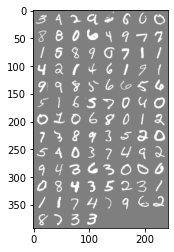

    3     4     2     9     6     6     0     0     8     8     0     6     4     9     7     7     1     5     8     9     0     7     1     1     4     2     1     4     6     1     9     1     9     9     8     5     6     6     5     6     5     1     6     5     7     0     4     0     0     1     0     6     8     0     1     2     7     3     8     9     3     5     2     0     5     4     0     3     7     4     9     2     9     4     3     6     3     0     0     0     0     8     4     3     5     2     3     1     1     1     7     4     7     9     6     2     8     7     3     3


In [54]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].item() for j in range(batch_size)))

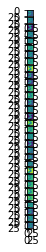

In [38]:
# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
data, _ = train_mnist[0]
data.unsqueeze_(0)
output = model(data)

act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])

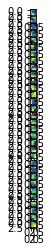

In [53]:
kernels = model2.conv1.weight.detach()
fig, axarr = plt.subplots(kernels.size(0))
for idx in range(kernels.size(0)):
    axarr[idx].imshow(kernels[idx].squeeze())

actual number : [2 9 6 1 8 1 7 7 8 7]
Prediction number: [2 9 6 1 8 1 7 7 8 7]


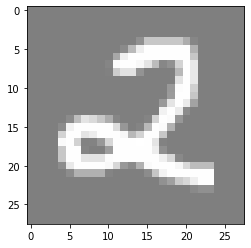

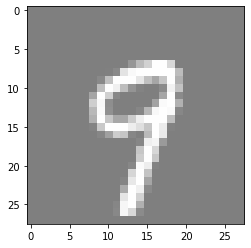

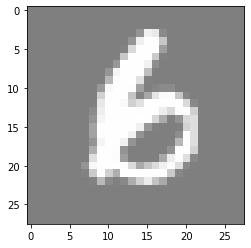

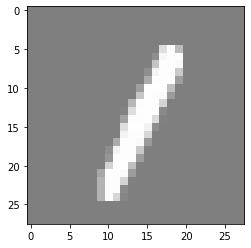

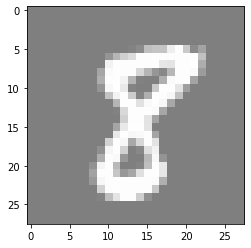

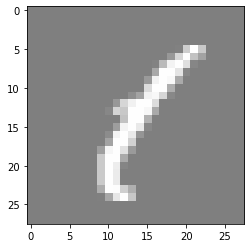

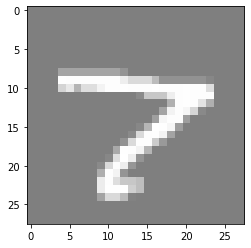

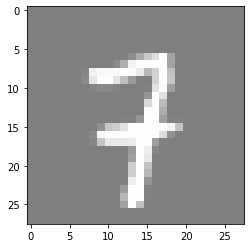

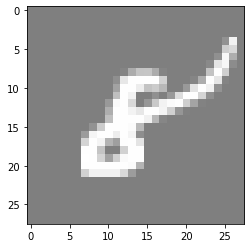

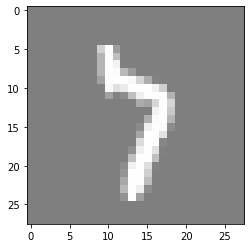

Actual number: [2 9 6 1 8 1 7 7 8 7]


In [56]:
sample = next(iter(test_dataloader))
imgs, lbls = sample
actual_number = lbls[:10].numpy()
print('actual number :', actual_number)
test_output = model2(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
for img in imgs[:10]:
    imshow(torchvision.utils.make_grid(img))
print(f'Actual number: {actual_number}')